mario: (64, 64, 64) 524.3KB
2.0 0.9999999999999999 1.0089858125183286
2.0 0.9999999999999999 1.0089858125183286


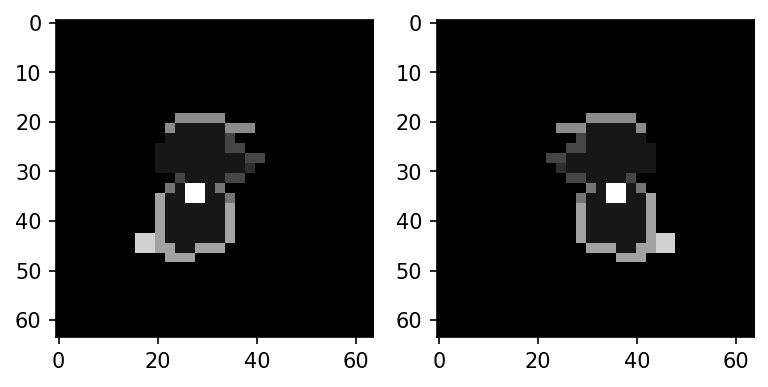

In [298]:
import matplotlib.pyplot as plt
import sscPhantom
import numpy as np

N = 64
Z=0.5
shift = 5
noise = False
unwrap = False

path_tomo = "/ibira/lnls/beamlines/caterete/apps/jupyter/00000000/proc/recons/phantom_complex/object_phantom_complex.npy"
path_phantom = "/ibira/lnls/beamlines/caterete/apps/jupyter/00000000/proc/recons/phantom_complex/phantom_complex.npy"

mario = sscPhantom.mario.createMario(shape=N, noise=noise, zoom=Z)
phase = mario/mario.max()  + 1
if unwrap == True:
    phase = 20*phase
    gradient = np.ones_like(phase)
    values = np.linspace(0,1,phase.shape[0])*2*np.pi
    for i in range(phase.shape[0]):
        gradient[i,:,:] = gradient[i,:,:]*values[i]
        gradient[:,i,:] = gradient[:,i,:]*values[i]
    phase = phase + gradient    
phase = np.flip(phase,axis=1)
phase = np.roll(phase,shift,axis=1)
magnitude = mario/mario.max() + 1
# magnitude = np.roll(magnitude,shift-4,axis=0)
magnitude = np.roll(magnitude,-shift,axis=1)

phantom = magnitude*np.exp(1j*phase)

magnitude = np.abs(phantom)
phase = np.angle(phantom)

figure, ax = plt.subplots(1,2,dpi=150)
ax[0].imshow(magnitude[:,:,phantom.shape[0]//2],cmap='gray')
ax[1].imshow(phase[:,:,phantom.shape[0]//2],cmap='gray')

np.save(path_phantom,phantom)

print(np.max(np.abs(phantom)),np.min(np.abs(phantom)),np.mean(np.abs(phantom)))
print(np.max(np.angle(phantom)),np.min(np.angle(phantom)),np.mean(np.angle(phantom)))


(128, 64, 64)

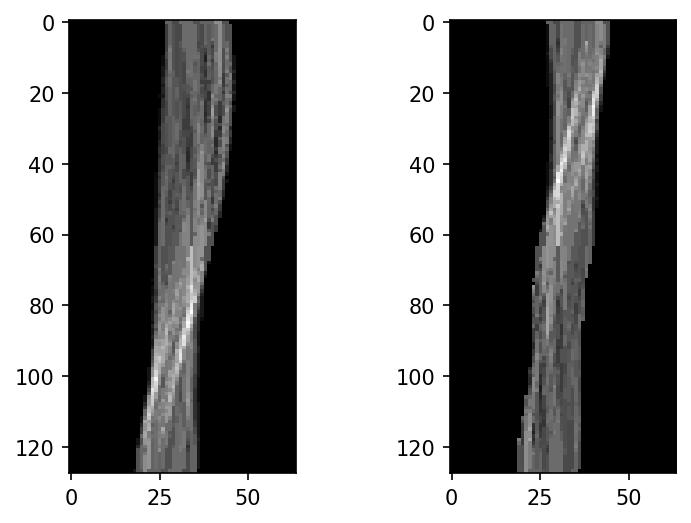

In [299]:
GPUs    = [5]
nangles = 2*N
magnitude = np.abs(phantom) - 1
phase = np.angle(phantom) - 1
tomogram_magnitude = np.swapaxes( radon.radon_gpu_block( magnitude, nangles, GPUs, blocksize=10 ), 0, 1)
tomogram_phase     = np.swapaxes( radon.radon_gpu_block( phase, nangles, GPUs, blocksize=10 ), 0, 1)

# noise = np.random.normal(0, phantom.max()/100, tomogram_magnitude.shape)
# tomogram_magnitude = tomogram_magnitude + 1 * noise

# noise = np.random.normal(0, phantom.max()/100, tomogram_phase.shape)
# tomogram_phase = tomogram_phase + 1 * noise

tomogram = tomogram_magnitude*np.exp(1j*tomogram_phase)

figure, ax = plt.subplots(1,2,dpi=150)
ax[0].imshow(np.abs(tomogram[:,tomogram.shape[1]//2,:]),cmap='gray')
ax[1].imshow(np.angle(tomogram[:,tomogram.shape[1]//2,:]),cmap='gray')

np.save(path_tomo,tomogram)

tomogram.shape

# temp_tomogram, shiftv    = radon.get_wiggle( tomogram_equalized, "vertical", nproc, ref )
# temp_tomogram, shiftv    = radon.get_wiggle( temp_tomogram, "vertical", nproc, ref )
# updated_tomogram, shifth, cmass = radon.get_wiggle( temp_tomogram, "horizontal", nproc, ref )
# tomogram

In [249]:
path = "/ibira/lnls/beamlines/caterete/apps/jupyter/00000000/data/ptycho3d/phantom_complex/positions"

angles = np.linspace(-90,90,tomogram.shape[0])*np.pi/180

for i, angle_number in enumerate(range(tomogram.shape[0])): 
    filename = str(angle_number).zfill(4)+f"_phantom_complex_001.txt"
    line = f"Ry: {angles[i]}\tPiezoB2\tPiezoB3\tPiezoB1\t"
    print(line)
    with open(os.path.join(path,filename), 'w') as f:
        f.write(line)

Ry: -1.5707963267948966	PiezoB2	PiezoB3	PiezoB1	
Ry: -1.5460593767666302	PiezoB2	PiezoB3	PiezoB1	
Ry: -1.5213224267383645	PiezoB2	PiezoB3	PiezoB1	
Ry: -1.4965854767100981	PiezoB2	PiezoB3	PiezoB1	
Ry: -1.4718485266818322	PiezoB2	PiezoB3	PiezoB1	
Ry: -1.447111576653566	PiezoB2	PiezoB3	PiezoB1	
Ry: -1.4223746266253001	PiezoB2	PiezoB3	PiezoB1	
Ry: -1.3976376765970338	PiezoB2	PiezoB3	PiezoB1	
Ry: -1.372900726568768	PiezoB2	PiezoB3	PiezoB1	
Ry: -1.3481637765405017	PiezoB2	PiezoB3	PiezoB1	
Ry: -1.3234268265122355	PiezoB2	PiezoB3	PiezoB1	
Ry: -1.2986898764839696	PiezoB2	PiezoB3	PiezoB1	
Ry: -1.2739529264557035	PiezoB2	PiezoB3	PiezoB1	
Ry: -1.2492159764274373	PiezoB2	PiezoB3	PiezoB1	
Ry: -1.2244790263991712	PiezoB2	PiezoB3	PiezoB1	
Ry: -1.1997420763709052	PiezoB2	PiezoB3	PiezoB1	
Ry: -1.175005126342639	PiezoB2	PiezoB3	PiezoB1	
Ry: -1.150268176314373	PiezoB2	PiezoB3	PiezoB1	
Ry: -1.125531226286107	PiezoB2	PiezoB3	PiezoB1	
Ry: -1.1007942762578409	PiezoB2	PiezoB3	PiezoB1	
Ry: -1.076057326229575	Pi